<a href="https://colab.research.google.com/github/vco2024/python-club-analysis-2025/blob/main/week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount drive and import libraries
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



Mounted at /content/drive


In [ ]:
#load and clean data
file_path = ('/content/drive/MyDrive/Python_Club_2025/'
              'data/pneumonia_recovery_dataset.csv')
df = pd.read_csv(file_path)
df.rename(columns={'patient_id': 'subject_id'}, inplace=True)
df.drop_duplicates(inplace=True)
median_bmi = df['bmi'].median()
df['bmi'] = df['bmi'].fillna(median_bmi)
df['sex'] = df['sex'].str.capitalize()
df['age'] = pd.to_numeric(df['age'])

print("Setup complete. Clean DataFrama 'df' is ready")


Setup complete. Clean DataFrama 'df' is ready


In [ ]:
#Deep Dive into .groupby() :  .groupby() method is the cornerstone of comparative analysis in Pandas.
#Before we apply it to our big dataset, let’s understand how it works using a tiny, custom dataset.
#3.1 The Concept: Split-Apply-Combine: Imagine you have a deck of mixed patient files.
#1. Split: You separate the files into two piles: one for "Treatment A" and one for "Treatment B".
#2. Apply: You calculate the average age for the "A" pile, and then the average age for the "B" pile.
#3. Combine: You write these two results down in a new summary table.
#This is exactly what df.groupby(’treatment_group’)[’age’].mean() does.

In [ ]:
#creat mini dataset
mini_data = {
    'Category': ['A', 'B', 'A', 'B', 'B'],
    'Value': [60, 50, 70, 80, 90]
}
mini_df = pd.DataFrame(mini_data)
print("our mini dataset:")
print(mini_df)

our mini dataset:
  Category  Value
0        A     60
1        B     50
2        A     70
3        B     80
4        B     90


In [ ]:
#Eg 1: The GroupBy Object: What happens when you first call .groupby()? You don’t get a result; you get a special object. This represents the "sorted piles" stage.
#group by 'category'
grouped_object = mini_df.groupby('Category')
print(grouped_object)



In [ ]:
#Eg 2: Inspecting a Single Group. We can look inside one of our "piles" using .get_group().
#look at only the data for each category
group_a = grouped_object.get_group('A')
print("Group A:\n", group_a)
group_b = grouped_object.get_group('B')
print("Group B:\n", group_b)

Group A:
   Category  Value
0        A     60
2        A     70
Group B:
   Category  Value
1        B     50
3        B     80
4        B     90


In [ ]:
#Eg 3: Applying a Single Function (.mean()) Now we apply a function. Pandas calculates the mean for pile ’A’ (10+30+50)/3 = 30 and pile ’B’ (20+40)/2 = 30.
#calculated the mean of 'Value for each 'Category'
grouped_mean = mini_df.groupby('Category')['Value'].mean()
print("\nMean value by category:")
print(grouped_mean)


Mean value by category:
Category
A    65.000000
B    73.333333
Name: Value, dtype: float64


In [ ]:
#Eg 4: Applying Multiple Functions (.agg()) We can calculate multiple statistics at once using .agg().
#calculate mean, count, and sum simultaneously
summary_stats = mini_df.groupby('Category')['Value'].agg(['mean', 'count', 'sum'])
print("detailed summary stats:")
print(summary_stats)

detailed summary stats:
               mean  count  sum
Category                       
A         65.000000      2  130
B         73.333333      3  220


In [ ]:
#Eg 5: Grouping by Multiple Columns: We can group by multiple categories at once. Let’s add a ’Sex’ column to our mini dataset to demonstrate.
#Add a new column to the mini dataset
mini_df['Sex'] = ['M', 'F', 'F', 'M', 'M']
mini_df.head()

,Category,Value,Sex
0,A,60,M
1,B,50,F
2,A,70,F
3,B,80,M
4,B,90,M


In [ ]:
# Group by BOTH Category and Sex
multi_group = mini_df.groupby(['Category', 'Sex'])['Value'].mean()
print ("Mean value grouped by Category AND Sex:")
print(multi_group)

Mean value grouped by Category AND Sex:
Category  Sex
A         F      70.0
          M      60.0
B         F      50.0
          M      85.0
Name: Value, dtype: float64


In [ ]:
# Reverse grouping
multi_group = mini_df.groupby(['Sex', 'Category'])['Value'].mean()
print ("Mean value grouped by Sex AND Category:")
print(multi_group)

Mean value grouped by Sex AND Category:
Sex  Category
F    A           70.0
     B           50.0
M    A           60.0
     B           85.0
Name: Value, dtype: float64


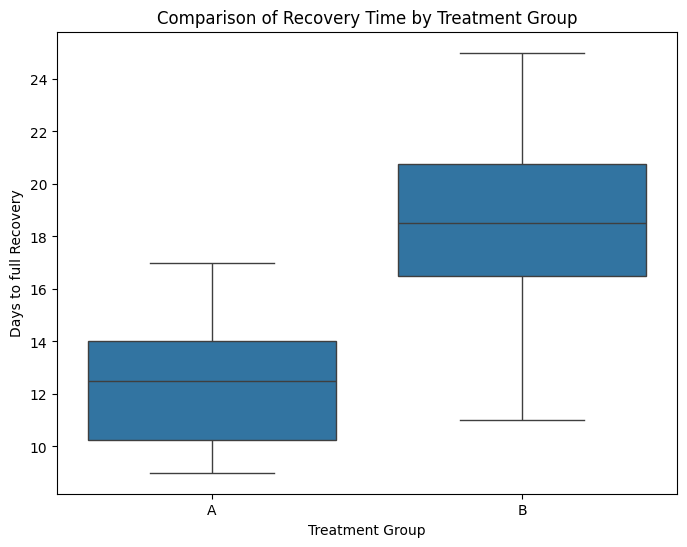

In [ ]:
#Answering Hypothesis #1: Is Treatment A More Effective?
#COMPARATIVE BOX PLOT
plt.figure(figsize=(8, 6))
# Create a box plot comparing a numerical column ('y ') across different categories ('x ')
sns.boxplot(data=df, x='treatment_group', y= 'days_to_recovery')
plt.title('Comparison of Recovery Time by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Days to full Recovery')
plt.show()

In [ ]:
#Quantitative evidence using GroupBY
#describe gives us count, mean, std, min, quartiles, max.
recovery_stats = df.groupby('treatment_group')['days_to_recovery'].describe()
print("Full recovery statistics by group:")
print(recovery_stats)


Full recovery statistics by group:
                 count  mean       std   min    25%   50%    75%   max
treatment_group                                                       
A                 10.0  12.5  2.549510   9.0  10.25  12.5  14.00  17.0
B                 10.0  18.3  4.423423  11.0  16.50  18.5  20.75  25.0


In [ ]:
recovery_stats_2 = df.groupby(['treatment_group','sex'])['days_to_recovery'].describe()
print("Full recovery statistics by group and sex:")
print(recovery_stats_2)


Full recovery statistics by group and sex:
                        count    mean       std   min    25%   50%    75%  \
treatment_group sex                                                         
A               Female    2.0  10.500  0.707107  10.0  10.25  10.5  10.75   
                Male      8.0  13.000  2.618615   9.0  11.50  13.5  14.25   
B               Female    8.0  17.125  4.015595  11.0  15.00  18.0  19.25   
                Male      2.0  23.000  2.828427  21.0  22.00  23.0  24.00   

                         max  
treatment_group sex           
A               Female  11.0  
                Male    17.0  
B               Female  23.0  
                Male    25.0  


In [ ]:
# Group by Treatment AND Sex
gender_recovery = df. groupby (['treatment_group','sex'])['days_to_recovery'].mean ()
print ("Mean recovery by Treatment and Sex:")
print (gender_recovery)

Mean recovery by Treatment and Sex:
treatment_group  sex   
A                Female    10.500
                 Male      13.000
B                Female    17.125
                 Male      23.000
Name: days_to_recovery, dtype: float64


In [ ]:
#Adding Statistical Evidence to Plots: add p-values directly to our plots.
#Seaborn doesn’t do this automatically, so we need a powerful library called statannotations.
#Step 1: Install and Import the Library
##     '!' in Colab to run shell commands like pip  ##
!pip install statannotations


In [ ]:
#Now we import the Annotator class, which will handle the statistical tests and drawing.
# Import the Annotator class
from statannotations.Annotator import Annotator

A vs. B: t-test independent samples, P_val:2.082e-03 t=-3.592e+00


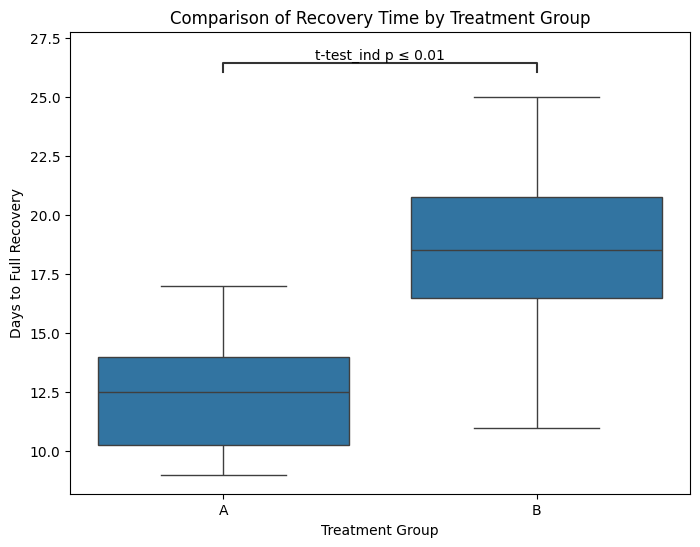

In [ ]:
# Creating a Publication-Quality Plot: first create the plot, and then use an Annotator to add the statistics on top of it.
#A: create the plot and store the azes object in 'ax'
plt.figure(figsize=(8,6))
ax = sns.boxplot(data=df, x='treatment_group', y = 'days_to_recovery')
#NEW CHANGE WEEK 6
plt.title('Final Analysis: Recovery Time by Treatment Groups')
plt.xlabel('Treatment Group')
plt.ylabel('Days to Full Recovery')

#B: add stats: specify pairs to compare
box_pairs = [("A", "B")]
#create annotator object
annotator = Annotator(ax, box_pairs, data=df, x='treatment_group', y='days_to_recovery')
#C: Configure the test (t- test ) and format ( simple p- value )
annotator.configure(test='t-test_ind', text_format = 'simple', loc ='inside')
#apply test and draw annotations
annotator.apply_and_annotate()
plt.show()


In [ ]:
##Understanding the Parameters:
#box_pairs: A list specifying which groups to compare. We are comparing GroupA vs. Group B.
#test=’t-test_ind’: We use an independent t-test to check for significance.
#text_format=’simple’: Displays the raw p-value. Use ’star’ for asterisks (e.g.,***).

In [ ]:
#Professional Reporting: Dynamic Document Generation
# For manuscripts or formal reports, you often need a Word document. Instead of hardcoding the results, we will learn how to create a **dynamic report**.
#This means we calculate the statistics (like the p-value) in Python, and inject those numbers directly into the text.
#If the data changes, the report updates automatically!

#Step 1: Install the Library - Use '!' in Colab to run shell commands like pip
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 5.8 MB/s eta 0:00:00


In [ ]:
#Step 2: Create the Dynamic Report Script:
#This complete script performs the statistical test, formats the result string, generates the plot, and compiles everything into a Word document.
import docx
from docx.shared import Inches
from scipy.stats import ttest_ind #imports t-test fxn
from statannotations.Annotator import Annotator #ensure Annotator is loaded

#1 Calculate p-vlaue dynamically: separate the data into two groups for the t-test
group_a = df[df['treatment_group'] == 'A']['days_to_recovery']
group_b = df[df['treatment_group'] == 'B']['days_to_recovery']

#perform t-test
t_stat, p_val =ttest_ind(group_a, group_b)

#format the p-value string for the report
if p_val < 0.001:
  p_text ="p < 0.001"
else:
  p_text = f"p ={p_val:.4f}"

print(f"Caluated text for report: {p_text}")

#2 Save the annotator plot image
plt.figure(figsize=(8,6))
ax = sns.boxplot(data=df, x='treatment_group', y='days_to_recovery')
plt.title('Comparison of Recovery Time by treatment Group')

# Re - apply the annotator logic to the plot we are saving
annotator = Annotator (ax, [("A", "B")], data=df, x='treatment_group', y='days_to_recovery')
annotator.configure(test='t-test_ind', text_format='simple', loc='inside')
annotator.apply_and_annotate()

plt.savefig('annotated_plot.png')
plt.close() #close plot to prevent duplicate display

#3 Build the word doc
doc=docx.Document()
doc.add_heading('Pneumonia Recovery Study: Final Report', 0)
doc.add_heading ('Results', level=1)

#use an f string to insert the calculated p_text variable!
doc.add_paragraph(
    f"A statistically significant difference in recovery time was"
    f"observed between the two treatment groups. Patients in the"
    f"experimental group (A) recovered significantly faster than"
    f"those in the standard group (B), as determined by an"
    f"independent t-test ({p_text})."
)
doc.add_picture('annotated_plot.png', width=Inches(6.0))
doc.save('Final_report_dynamic.docx')
print("Dynamic report generated successfully!")


Caluated text for report: p =0.0021
A vs. B: t-test independent samples, P_val:2.082e-03 t=-3.592e+00
Dynamic report generated successfully!
